<a href="https://colab.research.google.com/github/MansiKaushik123/Tweets_Sentiment_Analysis-Classification/blob/main/Tweets_Sentiment_Analysis_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Tweets Sentiment Analysis-Classification



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** - Mansi Kaushik


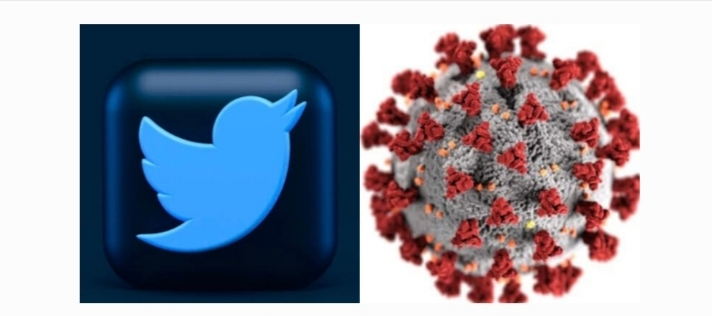

# **Project Summary -**

Write the summary here within 500-600 words.

The COVID-19 pandemic greatly disrupted society, leading to lockdowns that confined people to their homes and negatively affecting various aspects of life.

Our analysis aimed to understand people's feelings by examining their tweets on Twitter. Twitter is a significant platform for sharing thoughts and opinions on social media.

**APPROACH:**

1.Getting the dataset

2.Importing libraries

3.Importing datasets

4.Finding Missing Data

5.Text Preprocessing

6.Exploratory Data Analysis

7.Feature Engineering & Pre-Preprocessing

8.Model Training

**ALGORITHMS USED:**

1.Logistic Regression with Grid Search CV

2.Decision Tree Classifier(Count Vector and TF ID Vectorization techniques).

3.KNN(Count Vector and TF ID Vectorization techniques).

4.SVM Classifier (Count Vector and TF ID Vectorization techniques).

5.Multinomial Navies Bayes & Bernoulli Navies Bayes(Count Vector and TF ID Vectorization techniques).

6.Random Forest(Count Vector and TF ID Vectorization techniques).

7.Stochastic Gradient Descent(Count Vector and TF ID Vectorization techniques).

# **GitHub Link -**

Provide your GitHub Link here.
https://github.com/MansiKaushik123/Tweets_Sentiment_Analysis-Classification/blob/main/README.md

# **Problem Statement**


**Write Problem Statement Here.**

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets. The tweets have been pulled from Twitter and manual tagging has been done then.The names and usernames have been given codes to avoid any privacy concerns.

**Data Description:**

UserName

ScreenName

Location

TweetAt

OriginalTweet

Sentiment-Target variable



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

database = "/content/Coronavirus Tweets.csv"
tweet = pd.read_csv(database, encoding='latin1')  # Try 'latin1' encoding


### Dataset First View

In [4]:
# Dataset First Look
tweet.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
tweet.shape

(41157, 6)

In [6]:
tweet.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [7]:
tweet.index

RangeIndex(start=0, stop=41157, step=1)

### Dataset Information

In [ ]:
# Dataset Info
tweet.info()

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
tweet.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
tweet.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [ ]:
# Visualizing the missing values
tweet.isnull().sum().sort_values(ascending=False)

### **What did you know about your dataset?**

**Answer Here**

In your dataset, there are six columns with information. These columns are 'Location', 'UserName', 'ScreenName', 'TweetAt', 'OriginalTweet', and 'Sentiment'.

Location' column have duplicated value i.e 8590.This could be important for your Classification Machine Learning Project later on. You might want to consider how to handle this duplicate when you work on your project.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
tweet.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [11]:
# Dataset Describe
tweet.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


### **Variables Description**

**Answer Here**

**UserName:** The name of the person who post the tweet.

**ScreenName:** The unique name or handle that the person uses on Twitter.

**Location:** Where the person is from, like their city, state, or country.

**TweetAt:** The date and time when the tweet was posted.

**OriginalTweet:** The actual text of the tweet that was written.

**Sentiment:** The emotional tone of the tweet, like if it's positive, negative, really positive, really negative, or neutral. This is determined by a program that analyzes the words used in the tweet.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
print(tweet.apply(lambda col:col.unique()))

UserName         [3799, 3800, 3801, 3802, 3803, 3804, 3805, 380...
ScreenName       [48751, 48752, 48753, 48754, 48755, 48756, 487...
Location         [London, UK, Vagabonds, nan, ÃT: 36.319708,-8...
TweetAt          [16-03-2020, 17-03-2020, 18-03-2020, 19-03-202...
OriginalTweet    [@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/...
Sentiment        [Neutral, Positive, Extremely Negative, Negati...
dtype: object


In [13]:
tweet.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [14]:
tweet.Location.unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [15]:
# Chart - 1 visualization code
#Count the number of occurrences of each sentiment appears in the 'Sentiment' column of the 'tweet' DataFrame and then reset."
sentiment_count = tweet['Sentiment'].value_counts().reset_index()
#Change the names of the columns in the resulting DataFrame to 'Sentiment' and 'count', respectively.
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'count')

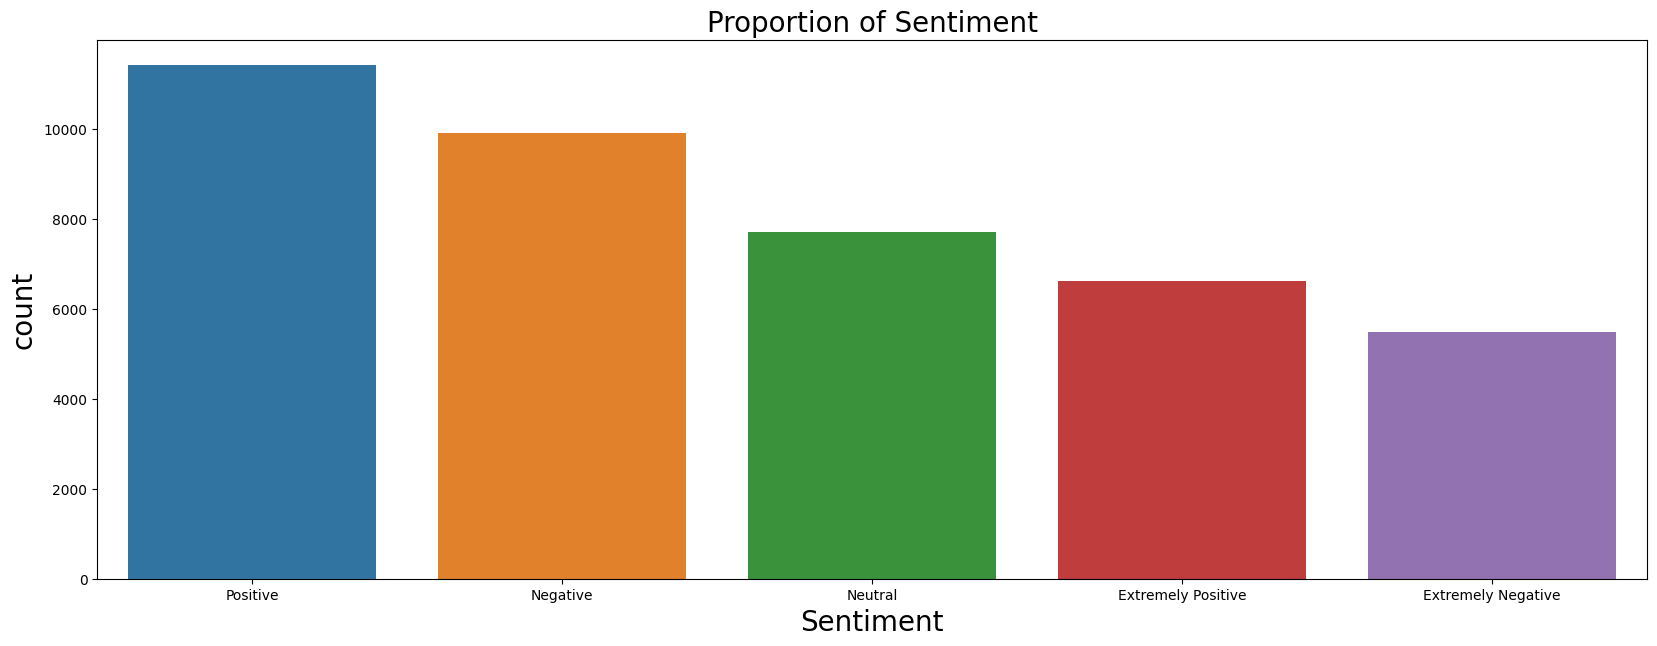

In [16]:
plt.figure(figsize=(20,7))
ax = sns.barplot(x='Sentiment',y='count',data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)


In [19]:
#replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
tweet = tweet.replace(replace_values)


In [20]:
sentiment_count1 = tweet['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1


,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


##### **1. Why did you pick the specific chart?**

**Answer Here.**

A bar graph has the ability to efficiently display the count of tweets for every sentiment classification in a clear and concise way.. Each sentiment classification can be symbolized by a bar, with the vertical extent of the bar signifying the number of tweets for that particular sentiment classification.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Positive Sentiment is high as compared to the Negative, Neutral Sentiment.



#### Chart - 2

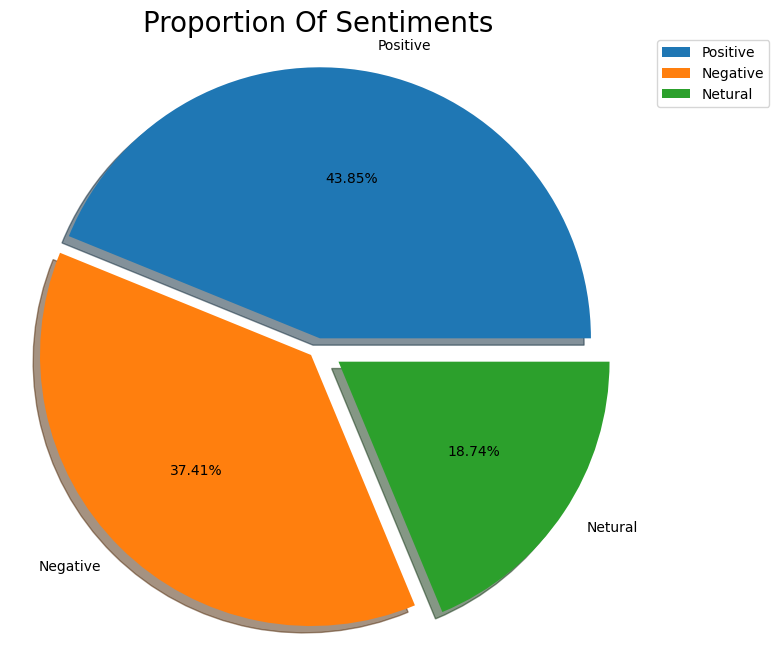

In [21]:
# Chart - 2 visualization code
#Creating a pie chart to show how different sentiments are spread out.
sentiment_count1 = tweet['Sentiment'].value_counts().to_list()
labels = ['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()






##### **1. Why did you pick the specific chart?**

**Answer Here.**

Pie charts are handy when you need to display how big different groups are compared to each other. They help you compare groups easily and quickly. Here, we're using pie charts to show the different types of feelings in tweets: happy, sad, and neutral. The whole set of tweets is like the whole pie, and the feelings are like slices of the pie.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Positive Sentiment is in High Proportion as 43.85% as compared to negative and netural i.e 18.74% and 37.41%.



Answer Here

#### Chart - 3

In [22]:
# Chart - 3 visualization code
Top_Location_Of_tweet= tweet['Location'].value_counts().head(10)
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [23]:
Top_Location_Of_tweet

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

In [24]:
Top_Location_Of_tweet=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet.reset_index(inplace=True)
Top_Location_Of_tweet.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet

,Location,Location_Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


[Text(0, 0, 'London'),
 Text(1, 0, 'United States'),
 Text(2, 0, 'London, England'),
 Text(3, 0, 'New York, NY'),
 Text(4, 0, 'Washington, DC'),
 Text(5, 0, 'United Kingdom'),
 Text(6, 0, 'Los Angeles, CA'),
 Text(7, 0, 'India'),
 Text(8, 0, 'UK'),
 Text(9, 0, 'Australia')]

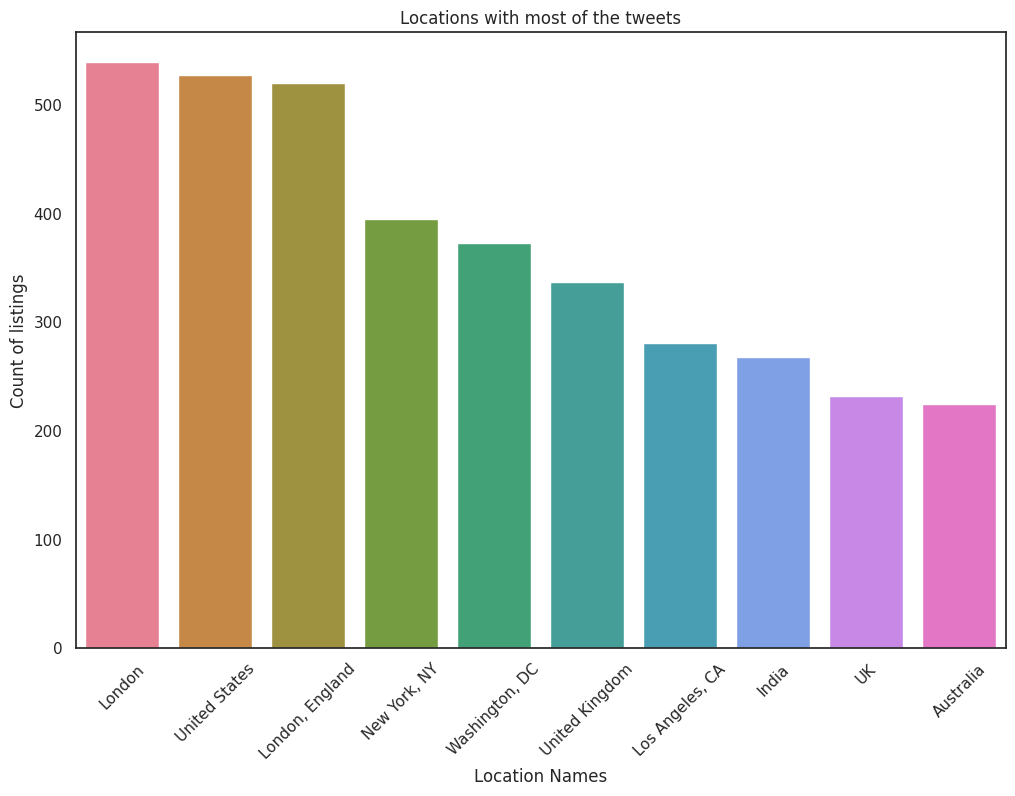

In [25]:
#plot a bar graph using the Seaborn library.
viz_1=sns.barplot(x="Location", y="Location_Count", data=Top_Location_Of_tweet,
                 palette="husl")
#Set the title of the plot, label for the y-axis, and label for the x-axis.
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
# Rotate x-axis labels by 45 degrees to make them easier to read
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)


##### **1. Why did you pick the specific chart?**


**Answer Here.**

To  visulaize this information, a bar graph is a great option. A bar graph can easily display how many tweets come from each place in a straightforward manner. Each place is shown as a bar, and the bar's height tells you how many tweets are from that place.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The city of London has more tweets than any other city.

#### Chart - 4

In [26]:
# Chart - 4 visualization code
#Finds out how many characters are in each tweet and saves this information in the text_length column.
tweet['text length'] = tweet['OriginalTweet'].apply(len)

In [27]:
tweet_character_length = tweet['text length'].sort_values(ascending=False)

In [28]:
#Make a table called "top_tweet_character_length" using the information in the table named "tweet_character_length"
top_tweet_character_length = pd.DataFrame(tweet_character_length)
# Reset the index of `top_tweet_character_length` and assign the result back to `top_tweet_character_length`
top_tweet_character_length.reset_index(inplace=True)
#Change the names of the columns in the 'top_tweet_character_length' to 'Original_Tweet_Row' and 'tweet_character_Count'.
top_tweet_character_length.rename(columns={'index':'Original_Tweet_Row', 'text_length':'tweet_character_Count'}, inplace=True)


In [29]:
top_tweet_character_length

,Original_Tweet_Row,text length
0,25160,355
1,7483,350
2,29688,341
3,17811,340
4,27346,338
...,...,...
41152,15577,12
41153,16872,11
41154,35526,11
41155,20467,11


In [30]:
#Choose the 10 longest tweets, arrange them in  descending order, and store them in a variable called top_tweet_length.
top_tweet_length=top_tweet_character_length.head(10).sort_values(by='tweet_character_Count',ascending=False)
plt.figure(figsize=(12, 8))
# Create a bar plot using Seaborn, with 'Original_Tweet_Row' on the x-axis, 'tweet_character_Count' on the y-axis, and `top_tweet_length` as the data source
bar_plot = sns.barplot(x="Original_Tweet_Row", y="tweet_character_Count", data=top_tweet_length, palette='viridis')




KeyError: ignored

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [31]:
# Chart - 5 visualization code
# Count the number of tweets for each different date in the 'TweetAt' column of the 'tweet' dataset, and show the 15 dates with the highest tweet counts.
tweet['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [32]:
# Count the number of tweets for each unique date in the 'TweetAt' column of `tweet` and display the 15 most frequent dates
tweet['TweetAt'].value_counts().head(15)


20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
Name: TweetAt, dtype: int64

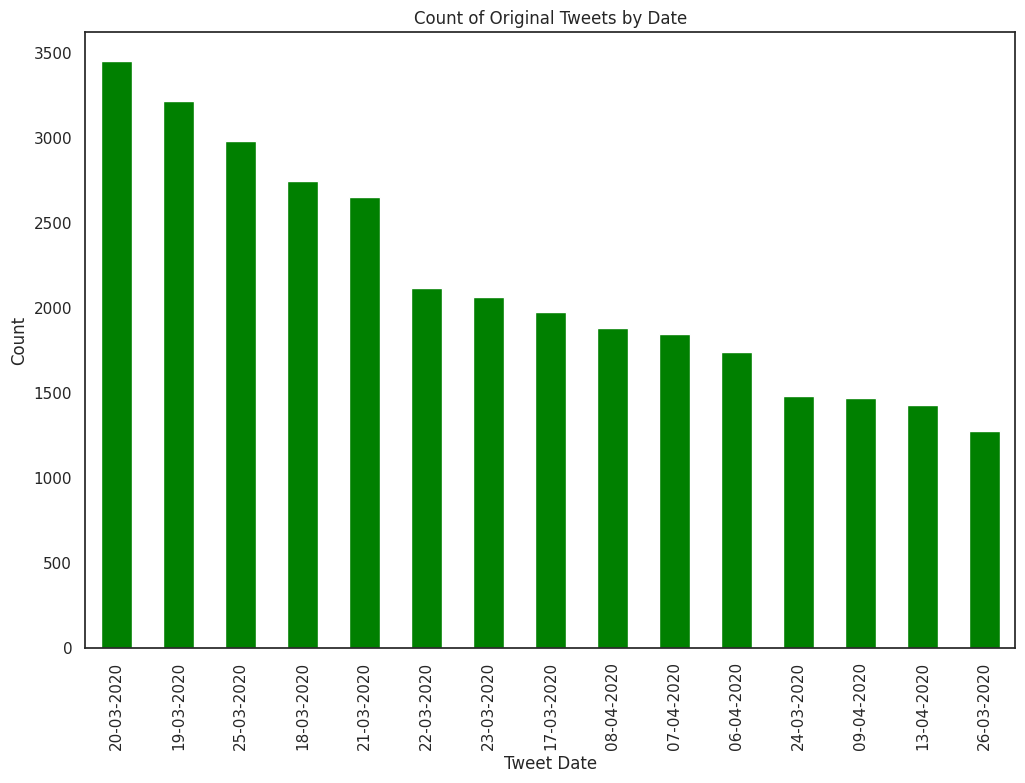

In [33]:

import pandas as pd
import plotly.express as px
# Create a bar graph for the original tweet column.
tweet['TweetAt'].value_counts().head(15).plot(kind='bar',color='green')

# set the plot title and axis labels
plt.title('Count of Original Tweets by Date')
plt.xlabel('Tweet Date')
plt.ylabel('Count')

# display the plot
plt.show()

##### **1. Why did you pick the specific chart?**







**Answer Here.**
A bar graph is a popular way to show information about different categories, like dates or types, by using bars to represent how many times each category appears.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

On March 20, 2020, there were the most tweets ever, totaling 3448.






## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [34]:
# Handling Missing Values & Missing Value Imputation
tweet.isnull().sum().sort_values(ascending=False)

Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
Sentiment           0
text length         0
dtype: int64

#### **What all missing value imputation techniques have you used and why did you use those techniques?**

**Answer Here.**

here we can see we have null values in 'Location'(8590) columnso we are not taking location column for machine learning model as sentiment analysis

### 2. Handling Outliers

In [35]:
# Handling Outliers & Outlier treatments
print(tweet[['OriginalTweet', 'Sentiment']].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB
None


##### **What all outlier treatment techniques have you used and why did you use those techniques?**

**Answer Here.**

We do not treated/handled the outliers because we didn't choose any columns with continuous numbers (numerical data) as the main columns for training the model.

##**4. Textual Data Preprocessing**
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [36]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [38]:
import regex as re

In [39]:
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)


In [40]:
#Text normalization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### **Which text normalization technique have you used and why?**

**Answer Here.**

Here we use only Lemmatization normalization technique because Lemmatization is a technique used for text normalization that reduces words to their base or dictionary form, known as a lemma .Hence ,we used Lemmatization technique as proper text form and later used for classfication modelling .

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today https/20.89.")


'gon na home soon want talk stuff anymore tonight k cried enough today'

In [42]:
#Applying the transform_text() function on every entry in the 'OriginalTweet' column of the tweet dataset
tweet['Clean_tweets'] = tweet['OriginalTweet'].apply(transform_text)

In [43]:
 # Access the 'OriginalTweet' value in the row with integer in `tweet`
tweet.iloc[25160]["OriginalTweet"]


'Crude oil dropped to its lowest in 17 years in Asia as #coronavirus in #US and #EU shows little sign of slowing.\r\r\n\r\r\nNoon prices:\r\r\n#SPX500Â\x962504.3\r\r\n#NAS100Â\x967507.1\r\r\n#WTIÂ\x9620.24\r\r\n#GOLDÂ\x961618.08\r\r\n#SILVERÂ\x9614.118\r\r\n\r\r\nWatch these prices closely: https://t.co/WuiEEfSNOj\r\r\n\r\r\n#COVID19 #CoronaVirusOutbreak https://t.co/j68MZIDXAd https://t.co/9MyqGxutUU'

In [44]:
tweet.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text length,Clean_tweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,menyrbie chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,coronavirus australia woolworth give elderly d...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306,food stock one empty please panic enough food ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,310,ready go supermarket covid19 outbreak paranoid...


In [48]:
#Add a new column  to the tweet table named 'temp_list'.
tweet['temp_list'] = tweet['Clean_tweets'].apply(lambda x:str(x).split())



In [49]:
tweet['temp_list']

0                                     [menyrbie, chrisitv]
1        [advice, talk, neighbour, family, exchange, ph...
2        [coronavirus, australia, woolworth, give, elde...
3        [food, stock, one, empty, please, panic, enoug...
4        [ready, go, supermarket, covid19, outbreak, pa...
                               ...                        
41152    [airline, pilot, offering, stock, supermarket,...
41153    [response, complaint, provided, citing, relate...
41154    [know, getting, tough, kameronwilds, rationing...
41155    [wrong, smell, hand, sanitizer, starting, turn...
41156    [tartiicat, well, rift, going, amazon, rn, alt...
Name: temp_list, Length: 41157, dtype: object

In [50]:
from collections import Counter
import pandas as pd

#Make a single list containing all the words from the list inside another list.
word_list = [word for sublist in tweet['temp_list'] for word in sublist]

# Count how often each word appears and save it in a Counter container.
word_counts = Counter(word_list)

# Make a table with the 30 most frequently used words.
top_words = pd.DataFrame(word_counts.most_common(30), columns=['Common_words', 'count'])

# Add a colorful blend to the table's background to make it easier to see and understand.
styled_top_words = top_words.style.background_gradient(cmap='Reds')

In [52]:
top_words

,Common_words,count
0,coronavirus,18045
1,price,8936
2,store,8166
3,supermarket,7737
4,food,7221
5,grocery,6739
6,people,5563
7,amp,5197
8,consumer,5133
9,covid19,4935


In [54]:
#Create a new DataFrame  named neutral that includes only the 'Clean_Tweets' column from the tweet DataFrame where the 'Sentiment' column shows 'Neutral', 'Positive', or 'Negative'.
neutral=pd.DataFrame(tweet[['Clean_tweets']] [tweet['Sentiment'] == 'Neutral'])
positive=pd.DataFrame(tweet[['Clean_tweets']] [tweet['Sentiment'] == 'Positive'])
negative=pd.DataFrame(tweet[['Clean_tweets']] [tweet['Sentiment'] == 'Negative'])


In [55]:

positive

,Clean_tweets
1,advice talk neighbour family exchange phone nu...
2,coronavirus australia woolworth give elderly d...
3,food stock one empty please panic enough food ...
5,news first confirmed case came sullivan county...
6,cashier grocery store sharing insight prove cr...
...,...
41146,gold price rose high today due coronavirus inc...
41148,uv light sterilizer sanitizer mask mobile phon...
41150,never situation amp world going supermarket pi...
41151,mrsilverscott definitely man feel like fall ne...


In [56]:
negative

,Clean_tweets
4,ready go supermarket covid19 outbreak paranoid...
9,corona prevention stop buy thing cash use onli...
20,100 nation inficted covid 19 world must play f...
24,10downingstreet grantshapps done ensure food e...
26,preparation higher demand potential food short...
...,...
41133,singaporean politician slammed woman snapped s...
41147,really shitting much home covid19 coronavirus ...
41149,still shocked number toronto supermarket emplo...
41153,response complaint provided citing related del...


In [57]:
pip install wordcloud

In [59]:
# Create an empty list named spam_corpus.
spam_corpus = []
# Iterate over every row in a DataFrame named tweet where the column 'Sentiment' contains the word 'Neutral'.
for msg in tweet[tweet['Sentiment'] =='Neutral']['Clean_tweets'].tolist():
  # Split the 'Clean_Tweets' value into individual words using the `split()` method
    for word in msg.split():
       # Append each word to the `spam_corpus` list
        spam_corpus.append(word)

In [60]:
top_words

,Common_words,count
0,coronavirus,18045
1,price,8936
2,store,8166
3,supermarket,7737
4,food,7221
5,grocery,6739
6,people,5563
7,amp,5197
8,consumer,5133
9,covid19,4935


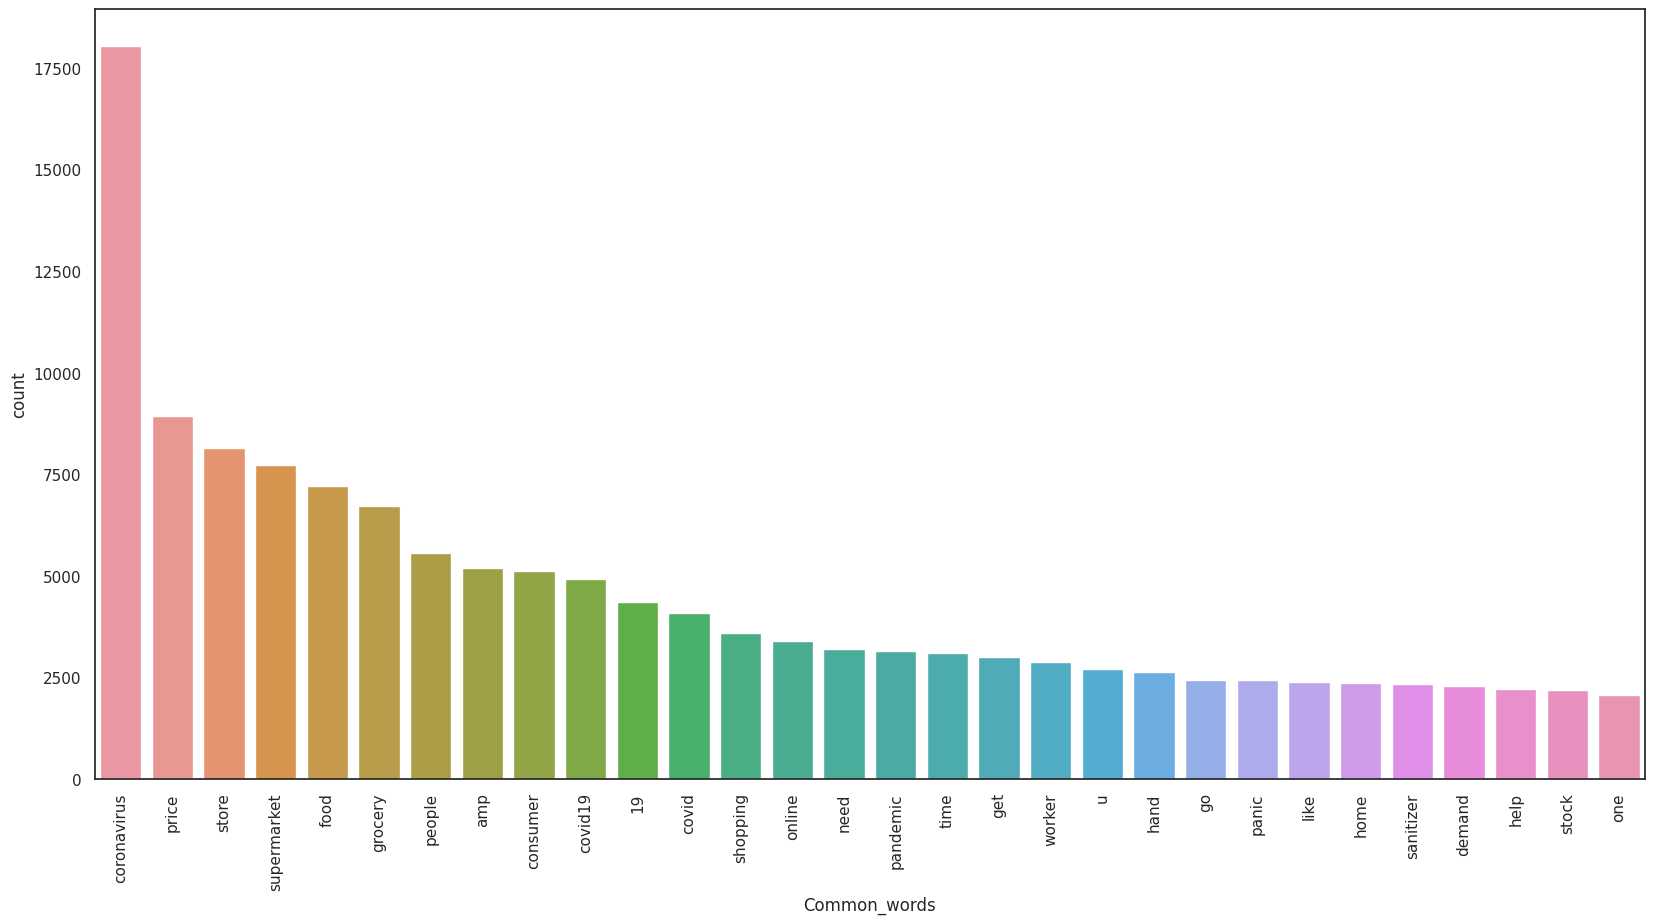

In [61]:
# Import the `Counter` class from the `collections` module
from collections import Counter
plt.figure(figsize=(20,10))
# Import the `seaborn` library for creating data visualizations
sns.barplot(x='Common_words',y='count',data=top_words)
# Set the x-axis labels to be vertical
plt.xticks(rotation='vertical')
# Show the plot
plt.show()

In [62]:
# Import the `WordCloud` class from the `wordcloud` module
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


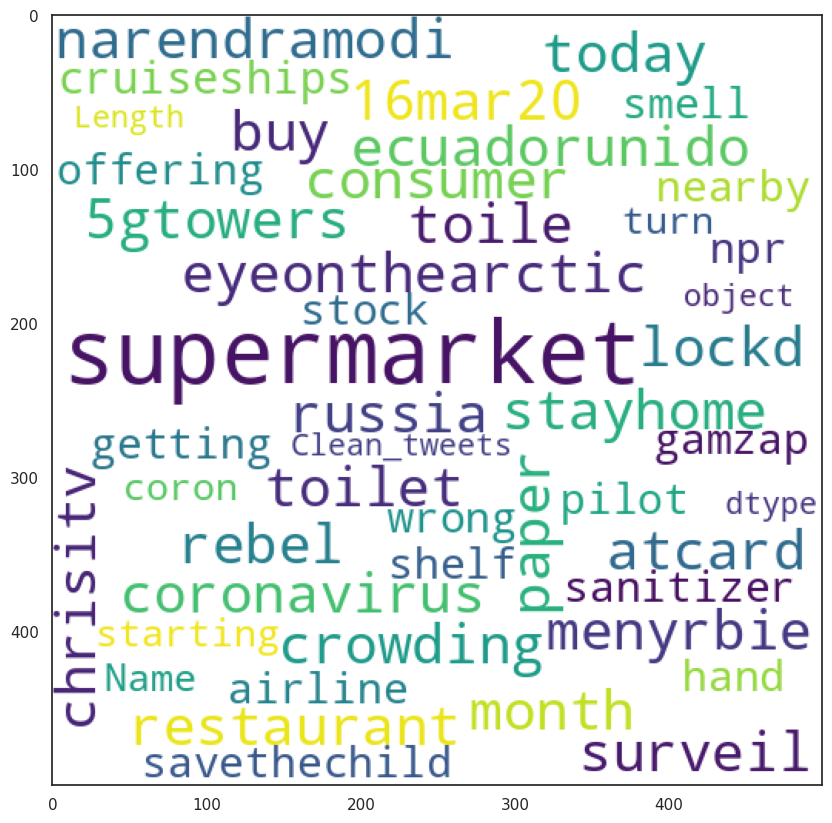

In [64]:
#Create a picture made of words using the WordCloud tool and the text information from the 'Clean_Tweets' section of a DataFrame named neutral.
tweet_wc = wc.generate(str(neutral['Clean_tweets']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)

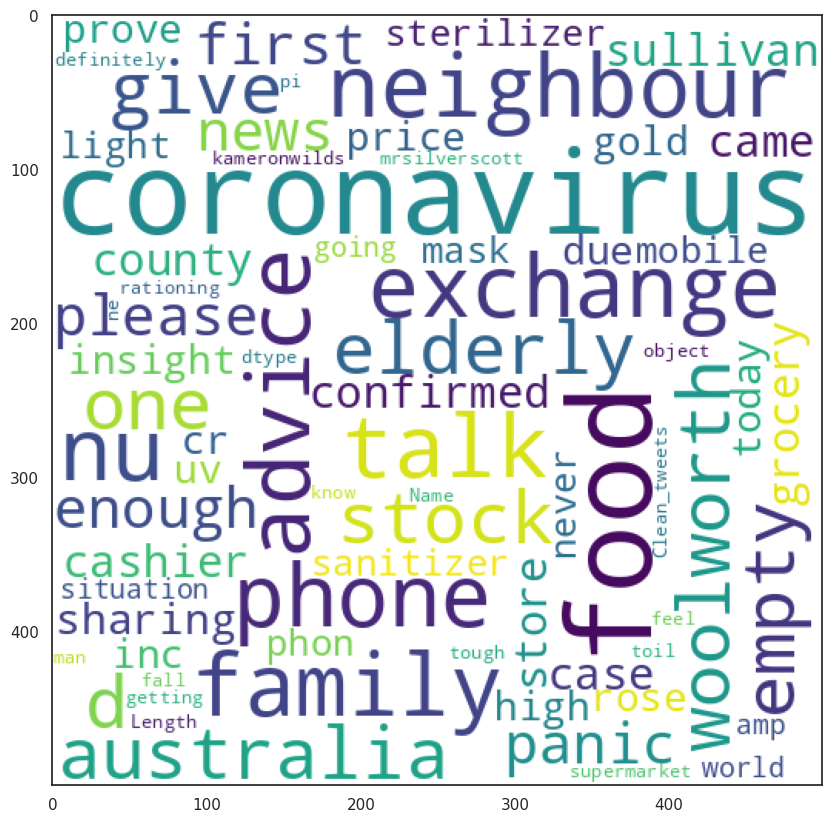

In [66]:
# Create a picture of words using the WordCloud tool and the text information from the 'Clean_Tweets' section of a DataFrame named positive.
tweet_wc = wc.generate(str(positive['Clean_tweets']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)


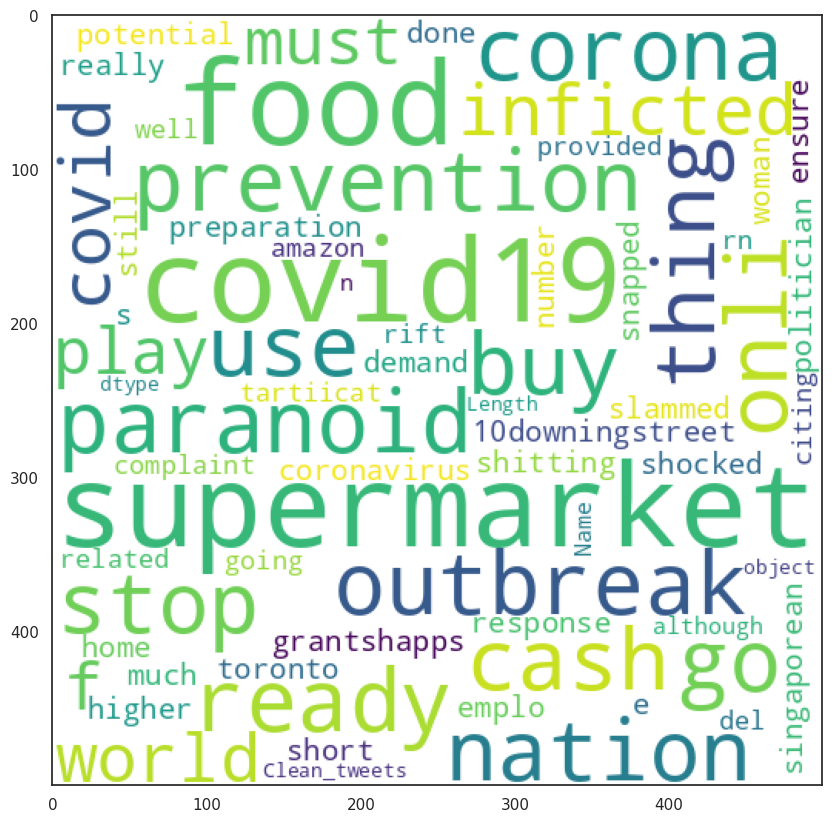

In [68]:
# Create a word picture using the WordCloud tool and the text info from the 'Clean_Tweets' section of a table named negative.
tweet_wc = wc.generate(str(negative['Clean_tweets']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)


###**Feature Manipulation & Selection**

# **Data Splitting**

In [70]:
#Assigning dependent and independent features
X= tweet['Clean_tweets']
y=tweet['Sentiment']


In [71]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

# **What data splitting ratio have you used and why?**

**Answer Here.**

 Data Splitting  the data into two parts: 80% for training and 20% for testing. Giving more data for training helps the model learn more about patterns and trends in the data. This makes the model better at making predictions on new data it hasn't seen before.

In [72]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

(32925,)


(8232,)

### 6. Data Scaling

**Which method have you used to scale you data and why?**

**Answer Here.**

You don't have to adjust the dataset's size here since we're just examining how people feel. So, we're only studying user emotions in tweets related to the Covid-19 situation.

# **Handling Imbalanced Dataset**

In [73]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
 6   text length    41157 non-null  int64 
 7   Clean_tweets   41157 non-null  object
 8   temp_list      41157 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.8+ MB


##### **Do you think the dataset is imbalanced? Explain Why.**

**Answer Here.**

No, we made a choice to use only two sections for creating machine learning models. These sections are named 'Original Tweet' and 'Sentiment.' And in both of these sections, there's the same number of rows.

## ***7. ML Model Implementation***

# **Count Vectorization (Bag of words)**

"Count vectorization changes text into numbers for machines to understand. First, the text is broken into words or parts, and then each part's count is used to make a number list showing how often each word appears."

**# Vectorizing Text**

In [74]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [75]:
# Bag of words
bw=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
bw_X_train=bw.fit_transform(X_train.astype(str).str.strip())

In [76]:
# Get the shape of the NumPy array bw_X_train
bw_X_train.shape

(32925, 19136)

In [77]:
# Use the prepared CountVectorizer 'bw' to change the test data 'X_test' into a bag-of-words style.
# The text data in 'X_test' is first converted to a string representation & then stripped of leading & trailing whitespace characters
bw_X_test=bw.transform(X_test.astype(str).str.strip())

In [78]:
# Get the shape of the NumPy array bw_X_test
bw_X_test.shape


(8232, 19136)

# **MODEL -1 WITH BAGS OF WORDS**

### ML Model - 1

# **Logistic regression**

"Logistic Regression is a type of math tool that helps us predict if something will happen or not. It works by looking at the chances of an event occurring, which are always between 0 and 1. It's also used for predicting multiple categories for an event based on different things we measure."

In [98]:
# Initializing the logistic regression model
lr_cv = LogisticRegression()

# Defining a dictionary of hyperparameters to tune over
parameters = {
    'penalty': ['l1', 'l2'],  # Regularization penalty to apply (L1 or L2)
    'C': [100, 10, 1.0, 0.1, 0.01]  # Inverse of regularization strength (lower values indicate stronger regularization)
}

# Creating a GridSearchCV object with cross-validation of 15
logreg_Gcv = GridSearchCV(lr_cv, parameters, cv=15)

# Fitting the training data to the GridSearchCV object to find the best hyperparameters
logreg_Gcv.fit(bw_X_train, y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [99]:
#predicted values
pred_lr_cv = logreg_Gcv.predict(bw_X_test)


In [100]:
pred_lr_cv

array(['Negative', 'Positive', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [101]:
#Accuracy
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.7876579203109816


In [102]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

              precision    recall  f1-score   support

    Negative       0.79      0.78      0.79      3080
     Neutral       0.69      0.69      0.69      1543
    Positive       0.83      0.83      0.83      3609

    accuracy                           0.79      8232
   macro avg       0.77      0.77      0.77      8232
weighted avg       0.79      0.79      0.79      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

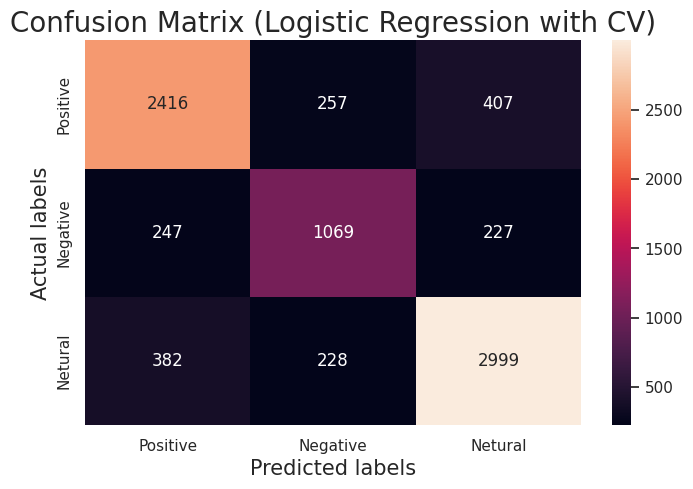

In [103]:
#Creating Confussion matrix
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

"In this case, the method used was Logistic Regression. It achieved an accuracy of 79% and showed improved scores for various evaluation measures like precision, recall, and F1 score across the 'Negative', 'Neutral', and 'Positive' labels."

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

GridSearchCV helps adjust two settings (hyperparameters) for the logistic regression model. These are the type of regularization (L1 or L2) and how strong the regularization should be (C value). To see how well the model works, it's tested using cross-validation with a 'cv' value of 15.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-79%

precision:-77%

recall:- 77%

f1-score:- 77%

**ML Model - 2**

# **Decision Tree Classifier with CV**

A Decision tree is a flowchart-like structure where each internal node represents a test on an attribute (i.e., a feature),each branch represents the outcome of the test, and each leaf node represents a class label or a numerical value (in the case of regression).

In [95]:

# Initializing model
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(bw_X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(bw_X_test)



In [96]:
# Accuracy
cv_score_dt_cv= cross_val_score(dt_cv,bw_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.705208807896735


In [93]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

              precision    recall  f1-score   support

    Negative       0.68      0.68      0.68      3080
     Neutral       0.64      0.67      0.66      1543
    Positive       0.75      0.74      0.75      3609

    accuracy                           0.71      8232
   macro avg       0.69      0.70      0.69      8232
weighted avg       0.71      0.71      0.71      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

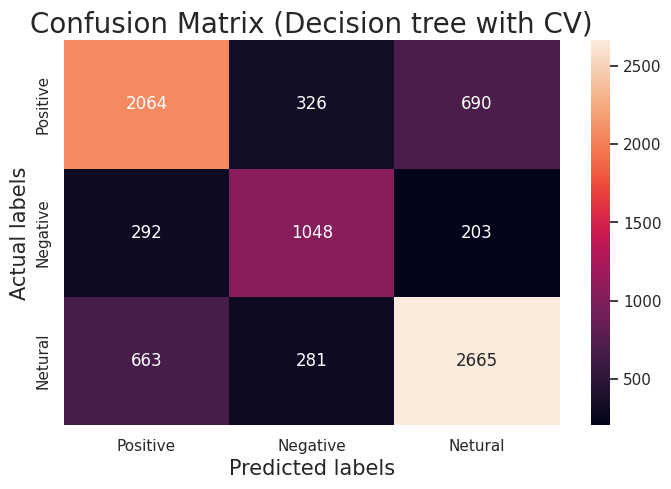

In [97]:
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

In this case, the method used a Decision Tree to make decisions. It was correct about 70% of the time. Also, various ways of measuring how well it did, like precision, recall, and F1 score, got better. These measurements were for different categories called 'Negative,' 'Neutral,' and 'Positive.'

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

The Scikit-learn library helps us do cross-validation on the decision tree model, splitting it into 5 parts. Then, we use the np.mean function to figure out the average accuracy score for all these parts.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-70%

precision:-71%

recall:- 70%

f1-score:- 71%

**ML Model - 3**

# **Navie Bayes**

Naive Bayes is a type of computer program used to solve problems where things need to be sorted into different categories. It's especially good for guessing categories when given some clues.


This program works by thinking about how likely something is to be true based on the clues it sees. If it finds more clues that point to one possibility, it guesses that possibility is more likely.

When using this program, it assumes that the clues it looks at don't really affect each other. In other words, it assumes that the presence or absence of one clue doesn't change the chance of another clue being true.

In [104]:
#Import Library GaussianNB,MultinomialNB,BernoulliNB and score metrics like accuracy ,confusion etc.
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [105]:
# Apply both  type of navies one by one
mnb = MultinomialNB()
bnb = BernoulliNB()

# **Multinomial Navie Bayes**


-Multinomial Naive Bayes: Utilized for categorical information where the characteristics denote tallies or instances of events (e.g., text data).

In [106]:
#Train a Multinomial Naive Bayes classifier called 'mnb' using the bag-of-words version of the training data 'bw_X_train' along with the matching labels 'y_train'.
mnb.fit(bw_X_train,y_train)
# Use the trained classifier to predict the labels for the bag-of-words representation of the test data 'bw_X_test'
y_pred2 = mnb.predict(bw_X_test)
# Compute the accuracy of the predicted labels 'y_pred2' with respect to the true labels 'y_test'
accuracy_mnb = accuracy_score(y_test,y_pred2)
# Print the accuracy of the Multinomial Naive Bayes classifier
print(accuracy_mnb)


0.6836734693877551


In [107]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

    Negative       0.69      0.72      0.70      3080
     Neutral       0.56      0.52      0.54      1543
    Positive       0.73      0.72      0.73      3609

    accuracy                           0.68      8232
   macro avg       0.66      0.65      0.66      8232
weighted avg       0.68      0.68      0.68      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

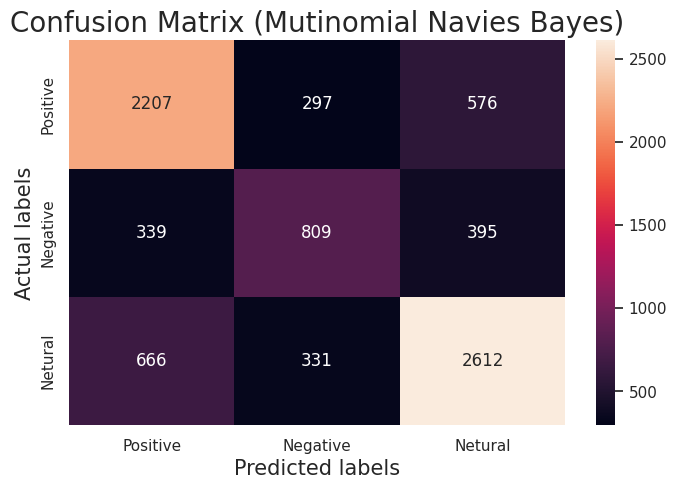

In [108]:
cf3= (confusion_matrix(y_test,y_pred2))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Mutinomial Navies Bayes)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


#1.**Explain the ML Model used and it's performance using Evaluation metric Score Chart**.



**Answer Here.**

In the given program, the method of Multinominal Navies Bayes was used to sort out the information. This led to a correctness rate of 68%. Also, various measures to judge the performance, like precision, recall, and f1 score, were computed for each category ('Negative', 'Neutral', 'Positive'). These measures demonstrated better results when compared to the initial model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-68%

Precision:-68%

Recall:- 69%

f1-score:- 68%

# **Bernoulli Navies Bayes**

Bernoulli Naive Bayes: a variant of Multinomial Naive Bayes used for binary or multiclass data where the features represent the presence or absence of a particular attribute (e.g., a word in a document).

In [109]:
#Fit a Multinomial Naive Bayes classifier 'mnb' to the bag-of-words representation
bnb.fit(bw_X_train,y_train)
# Use the trained classifier to predict the labels for the bag-of-words representation of the test data 'bw_X_test'
y_pred3 = bnb.predict(bw_X_test)
# Compute the accuracy of the predicted labels 'y_pred3' with respect to the true labels 'y_test'
accuracy_bnb = accuracy_score(y_test,y_pred3)
# Print the accuracy of the bernoulli Naive Bayes classifier
print(accuracy_bnb)

0.6936345966958212


In [110]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

    Negative       0.71      0.69      0.70      3080
     Neutral       0.55      0.70      0.62      1543
    Positive       0.76      0.70      0.73      3609

    accuracy                           0.69      8232
   macro avg       0.68      0.69      0.68      8232
weighted avg       0.70      0.69      0.70      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

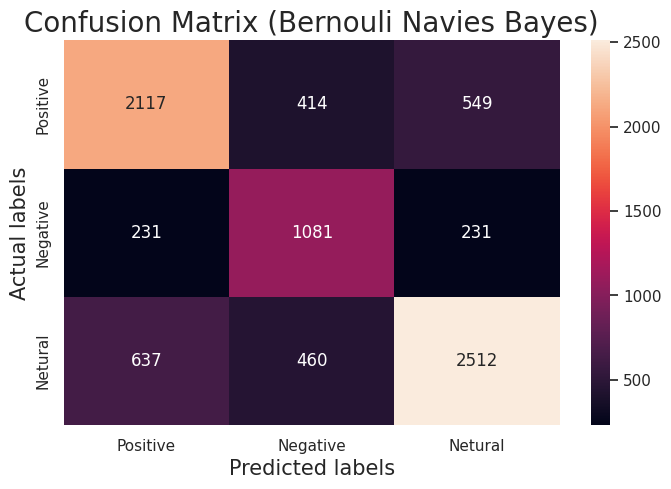

In [111]:
cf4= (confusion_matrix(y_test,y_pred3))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Bernouli Navies Bayes)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**



**Answer Here**

In the given program, the Bernoulli Naive Bayes method was employed to categorize the information, achieving a correctness rate of 69%. Furthermore, various measures for assessment, like precision, recall, and f1 score, were computed for every category ('Negative', 'Neutral', 'Positive') and indicated enhancement compared to the initial model.

**2.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-69%

Precision:-68%

Recall:- 70%

f1-score:- 68%

**ML Model - 4**

# **KNN(K-Nearest Neighbours)**

"It's a basic method that finds the K most similar examples from the training data to a given input and then predicts the label of the input based on what most of those examples have.

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Define parameter grid with range of values for n_neighbors
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,9]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Fit KNN model to training data and perform grid search
grid_search.fit(bw_X_train, y_train)

# Print best hyperparameters and corresponding mean cross-validation score
print('Best hyperparameters:', grid_search.best_params_)
print('Mean cross-validation score:', grid_search.best_score_)

Best hyperparameters: {'n_neighbors': 1}
Mean cross-validation score: 0.38526955201214885


In [113]:
#predicted values
pred_knn_cv = grid_search.predict(bw_X_test)


In [114]:
pred_knn_cv

array(['Neutral', 'Neutral', 'Negative', ..., 'Neutral', 'Negative',
       'Negative'], dtype=object)

In [115]:
# Accuracy
accuracy_KNN = accuracy_score(y_test,pred_knn_cv)
print("Accuracy :",(accuracy_KNN))


Accuracy : 0.39297862001943634


In [116]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_cv))

              precision    recall  f1-score   support

    Negative       0.65      0.30      0.41      3080
     Neutral       0.24      0.84      0.38      1543
    Positive       0.70      0.28      0.40      3609

    accuracy                           0.39      8232
   macro avg       0.53      0.47      0.40      8232
weighted avg       0.59      0.39      0.40      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

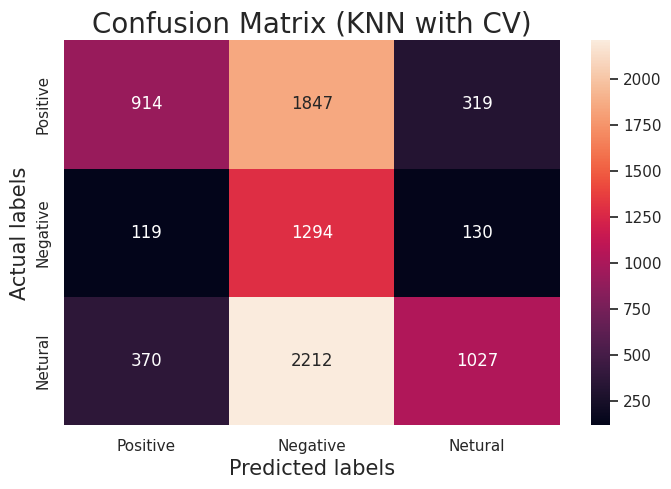

In [117]:
cf_knn= (confusion_matrix(y_test,pred_knn_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf_knn, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

The data was sorted using the KNN method, and the accuracy was found to be 39%. Moreover, various measures like precision, recall, and f1 score were computed for each category ('Negative', 'Neutral', 'Positive'). However, these measures did not show any enhancement compared to the initial model.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

The param_grid dictionary sets the range of choices for n_neighbors. It holds numbers from 1 to 9.
GridSearchCV checks how well the KNN method works for each n_neighbors value. This is done by testing with 5-fold cross-validation.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-38%

Precision:-53%

Recall:-47%

f1-score:- 40%

# **Support Vector Machine**

In [118]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(bw_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(bw_X_test)


In [119]:
pred_svm_cv

array(['Negative', 'Positive', 'Positive', ..., 'Neutral', 'Positive',
       'Neutral'], dtype=object)

In [120]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))


Accuracy : 0.7683430515063168


In [121]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

              precision    recall  f1-score   support

    Negative       0.79      0.75      0.77      3080
     Neutral       0.67      0.68      0.67      1543
    Positive       0.80      0.82      0.81      3609

    accuracy                           0.77      8232
   macro avg       0.75      0.75      0.75      8232
weighted avg       0.77      0.77      0.77      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

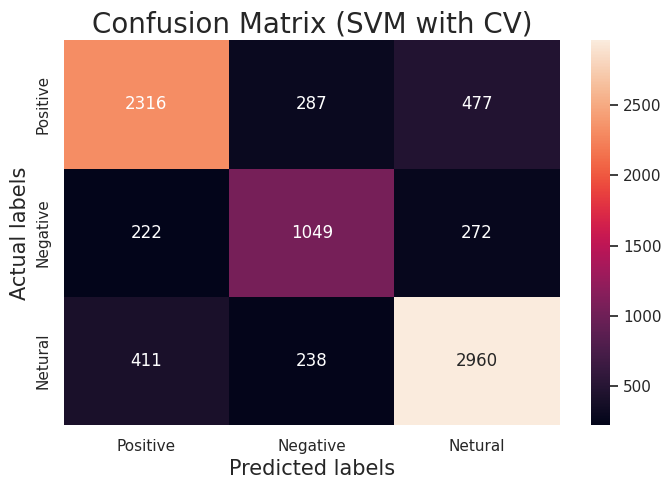

In [122]:
cf6= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf6, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-75%

Precision:-77%

Recall:- 77%

f1-score:-77%

**ML Model - 6**

# **Stochastic Gradient Descent**

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
# Initialize SGDClassifier object with desired hyperparameters
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, random_state=42, max_iter=1000)

# Train the model on the training data
sgd_clf.fit(tv_X_train, y_train)

# Predict labels for test data
y_pred_sgd_tv = sgd_clf.predict(tv_X_test)

# Calculate accuracy of classifier on test data
accuracy_sgd_tv= accuracy_score(y_test, y_pred_sgd_tv)
print('Accuracy:', accuracy_sgd_tv)

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_sgd_tv ))

In [ ]:
cf6a= (confusion_matrix(y_test,y_pred_sgd_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf6a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Stochastics Classifer with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here**

Stochastic Gradient Descent was used to sort the information, and this led to a correctness of 76%. Also, various ways to measure performance, like accuracy, completeness, and balance, were figured out for every category ('Bad', 'Okay', 'Good'). This made the new model much better than all the starting models.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

The Stochastic Gradient Descent (SGD) Classifier is set up with certain starting values for its special settings. These starting values are: loss='hinge', penalty='l2', alpha=0.0001, random_state=42, and max_iter=1000. In this situation, these initial values are used to teach the model using the training information and make guesses about the labels for the test information.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is improved as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-72%

Precision:-77%

Recall:- 77%

f1-score:-76%

## **Conclusion**